In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar archivo CSV
df = pd.read_csv("ResultadosSabanetaSaber11.csv")

# Información básica
print("Información del dataset")
print(df.info())
print("Primeras filas del dataset")
print(df.head())
print("Resumen estadístico del dataset")
print(df.describe())

Información del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Año          583 non-null    int64 
 1   Sector       583 non-null    object
 2   Colegio      583 non-null    object
 3   Código DANE  583 non-null    int64 
 4   Indicador    583 non-null    object
 5   Resultado    583 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 27.5+ KB
None
Primeras filas del dataset
    Año   Sector                       Colegio   Código DANE  \
0  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
1  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
2  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
3  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
4  2016  Público  I.E. Adelaida Correa Estrada  105631000050   

                               Indicador  Resultado  
0         Establecimie


Valores faltantes por columna:
Año            0
Sector         0
Colegio        0
Código DANE    0
Indicador      0
Resultado      0
dtype: int64


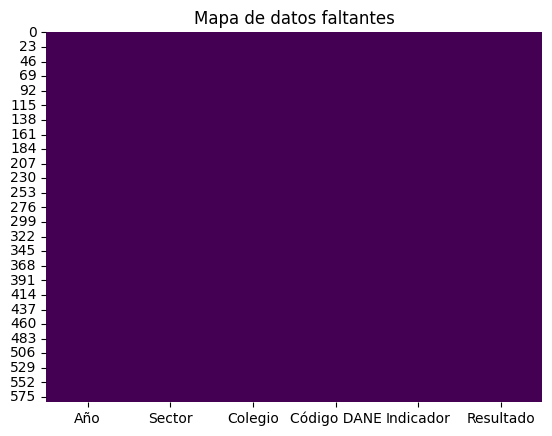

In [2]:
# Valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Visualización de nulos
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes")
plt.show()

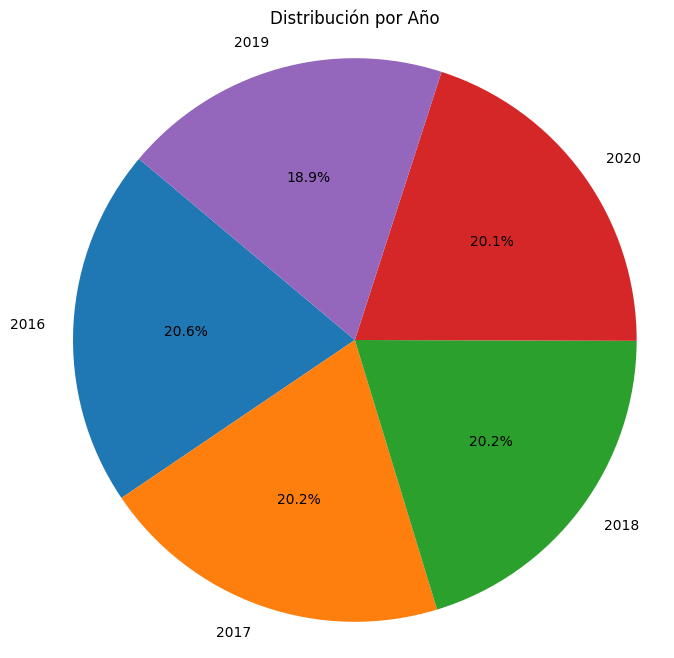

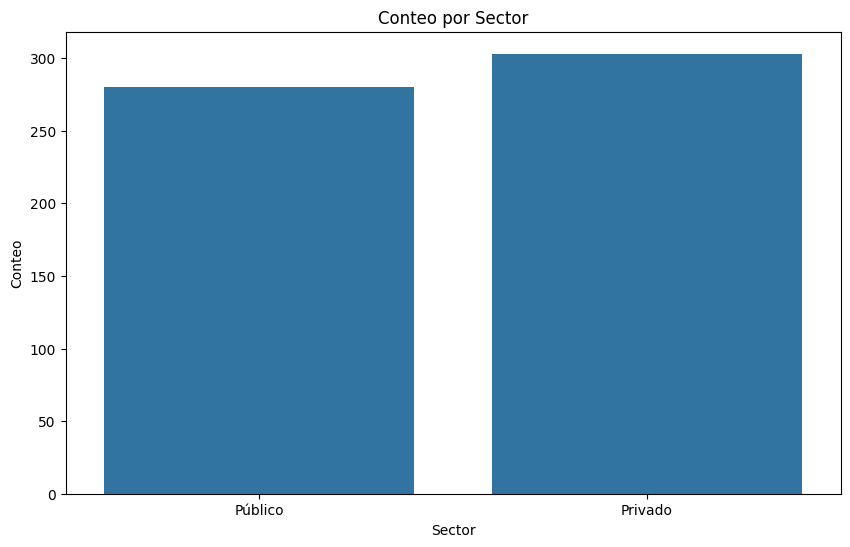

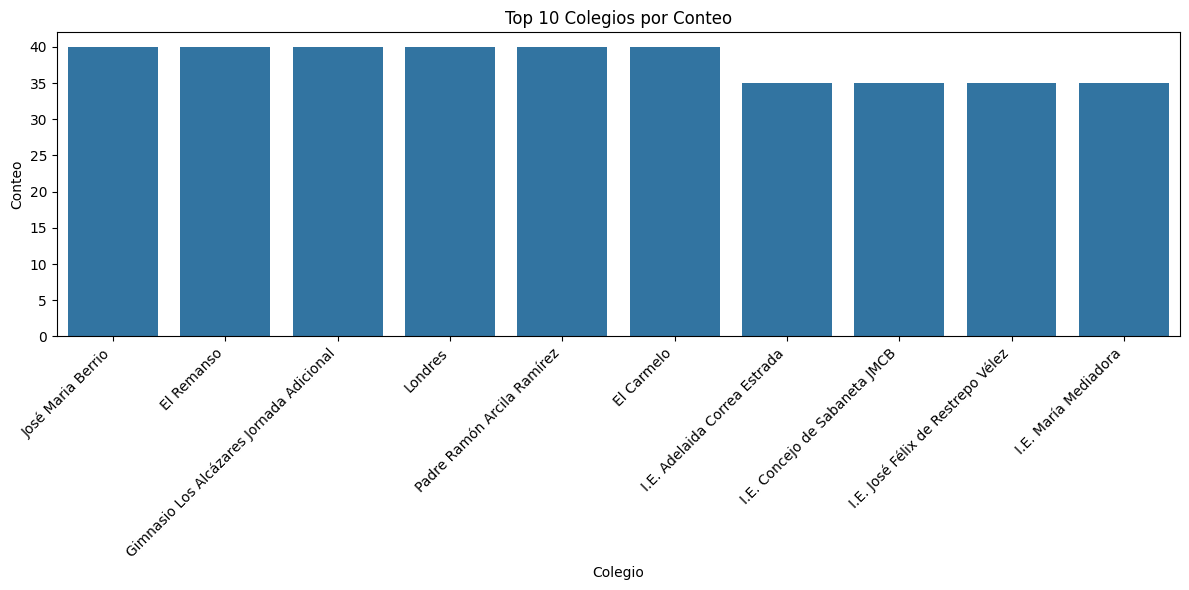

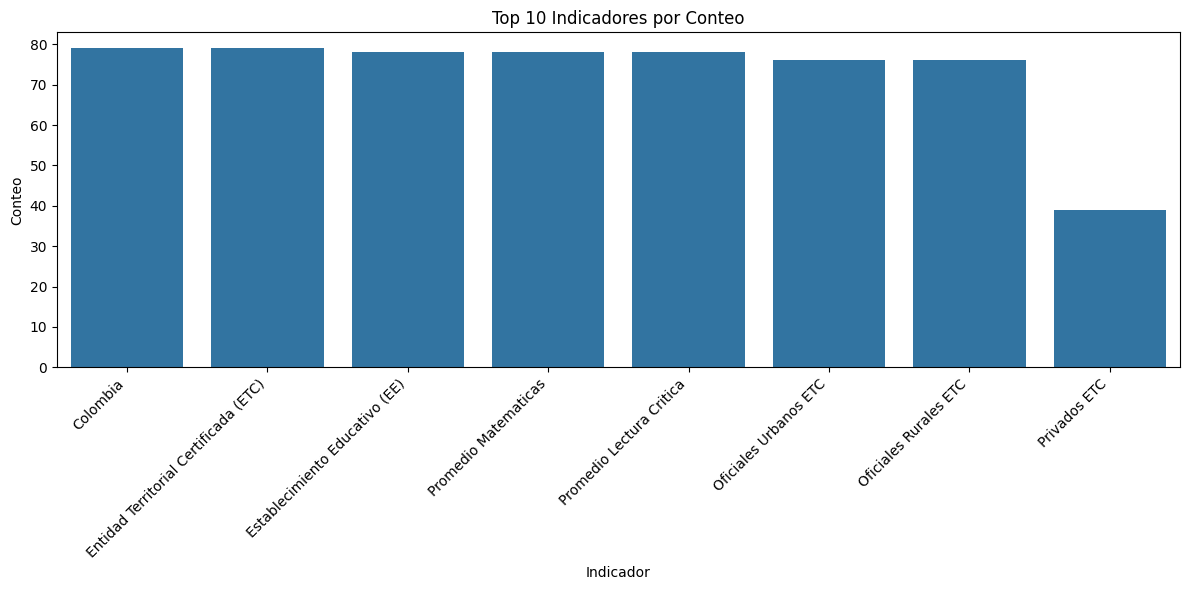

In [3]:
# Pie chart for 'Año'
year_counts = df['Año'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución por Año')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Bar chart for 'Sector'
plt.figure(figsize=(10, 6))
sns.countplot(x='Sector', data=df)
plt.title('Conteo por Sector')
plt.xlabel('Sector')
plt.ylabel('Conteo')
plt.show()

# Bar chart for 'Colegio' - might be too many unique values, showing top 10
plt.figure(figsize=(12, 6))
top_colleges = df['Colegio'].value_counts().nlargest(10)
sns.barplot(x=top_colleges.index, y=top_colleges.values)
plt.title('Top 10 Colegios por Conteo')
plt.xlabel('Colegio')
plt.ylabel('Conteo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Bar chart for 'Indicador' - might be too many unique values, showing top 10
plt.figure(figsize=(12, 6))
top_indicadores = df['Indicador'].value_counts().nlargest(10)
sns.barplot(x=top_indicadores.index, y=top_indicadores.values)
plt.title('Top 10 Indicadores por Conteo')
plt.xlabel('Indicador')
plt.ylabel('Conteo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

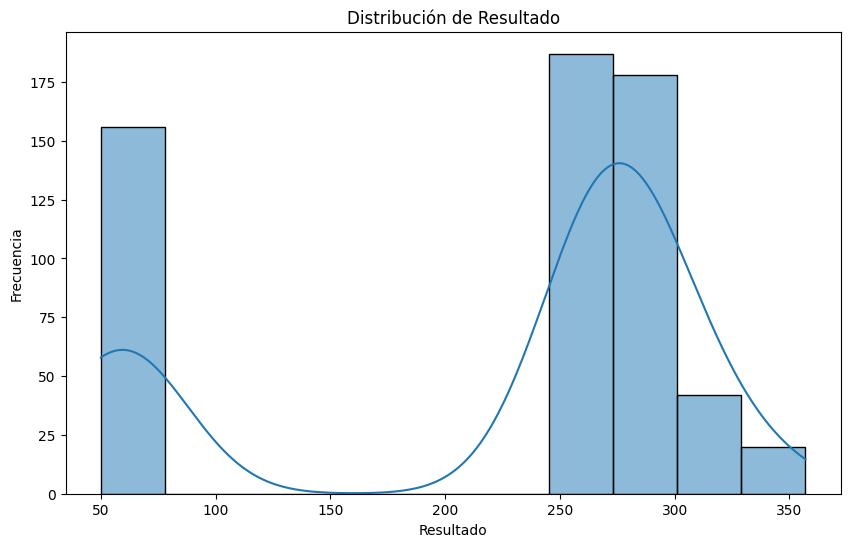

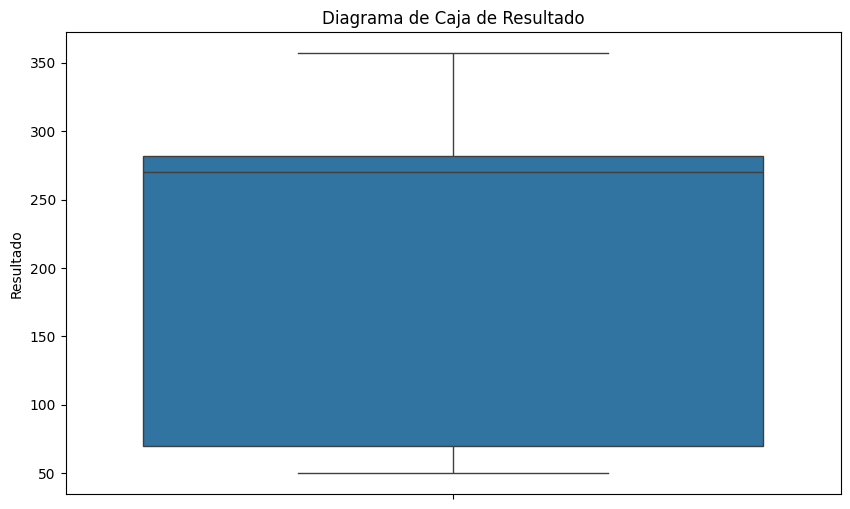

In [4]:
# Histograma para 'Resultado'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Resultado', kde=True)
plt.title('Distribución de Resultado')
plt.xlabel('Resultado')
plt.ylabel('Frecuencia')
plt.show()

# Diagrama de caja para 'Resultado'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Resultado')
plt.title('Diagrama de Caja de Resultado')
plt.ylabel('Resultado')
plt.show()

In [5]:
# Calculate the first quartile (Q1)
Q1 = df['Resultado'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df['Resultado'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Resultado'] < lower_bound) | (df['Resultado'] > upper_bound)]

print("Outliers based on IQR:")
display(outliers)

# Remove outliers
df_filtered = df[(df['Resultado'] >= lower_bound) & (df['Resultado'] <= upper_bound)]

print("\nDataFrame after removing outliers:")
display(df_filtered.head())
print("\nShape of original DataFrame:", df.shape)
print("Shape of filtered DataFrame:", df_filtered.shape)

Outliers based on IQR:


,Año,Sector,Colegio,Código DANE,Indicador,Resultado



DataFrame after removing outliers:


,Año,Sector,Colegio,Código DANE,Indicador,Resultado
0,2016,Público,I.E. Adelaida Correa Estrada,105631000050,Establecimiento Educativo (EE),285
1,2016,Público,I.E. Adelaida Correa Estrada,105631000050,Colombia,264
2,2016,Público,I.E. Adelaida Correa Estrada,105631000050,Entidad Territorial Certificada (ETC),295
3,2016,Público,I.E. Adelaida Correa Estrada,105631000050,Oficiales Urbanos ETC,282
4,2016,Público,I.E. Adelaida Correa Estrada,105631000050,Oficiales Rurales ETC,272



Shape of original DataFrame: (583, 6)
Shape of filtered DataFrame: (583, 6)


from matplotlib import pyplot as plt
_df_0['Resultado'].plot(kind='hist', bins=20, title='Resultado')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Indicador').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Año']
  ys = series['Resultado']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('Año', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Indicador')):
  _plot_series(series, series_name, i)
  fig.legend(title='Indicador', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Año')
_ = plt.ylabel('Resultado')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Año']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Año'}, axis=1)
              .sort_values('Año', ascending=True))
  xs = counted['Año']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Año', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Indicador')):
  _plot_series(series, series_name, i)
  fig.legend(title='Indicador', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Año')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Código DANE']
  ys = series['Resultado']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Código DANE', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Indicador')):
  _plot_series(series, series_name, i)
  fig.legend(title='Indicador', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Código DANE')
_ = plt.ylabel('Resultado')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Código DANE']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Código DANE'}, axis=1)
              .sort_values('Código DANE', ascending=True))
  xs = counted['Código DANE']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Código DANE', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Indicador')):
  _plot_series(series, series_name, i)
  fig.legend(title='Indicador', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Código DANE')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['Resultado'].plot(kind='line', figsize=(8, 4), title='Resultado')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['Indicador'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='Resultado', y='Indicador', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Shapiro-Wilk test: Statistic=0.7180, p-value=0.0000
Kolmogorov-Smirnov test: Statistic=0.3530, p-value=0.0000
Anderson-Darling test: Statistic=80.5745
  At 15.0% significance level, the data does not look normal (critical value=0.5720)
  At 10.0% significance level, the data does not look normal (critical value=0.6520)
  At 5.0% significance level, the data does not look normal (critical value=0.7820)
  At 2.5% significance level, the data does not look normal (critical value=0.9120)
  At 1.0% significance level, the data does not look normal (critical value=1.0850)
Jarque-Bera test: Statistic=105.4944, p-value=0.0000


<Figure size 800x600 with 0 Axes>

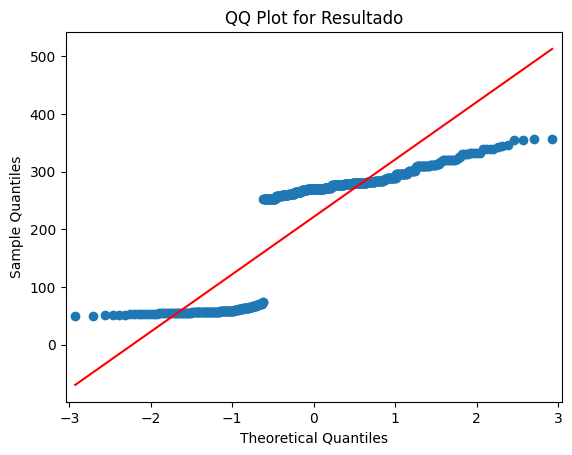

In [6]:
from scipy.stats import shapiro, kstest, anderson, jarque_bera
import statsmodels.api as sm

# Shapiro-Wilk test
shapiro_test = shapiro(df_filtered['Resultado'])
print(f"Shapiro-Wilk test: Statistic={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")

# Kolmogorov-Smirnov test (assuming normal distribution for comparison)
# The parameters for the normal distribution (mean and std dev) should be estimated from the data.
mean = df_filtered['Resultado'].mean()
std_dev = df_filtered['Resultado'].std()
ks_test = kstest(df_filtered['Resultado'], 'norm', args=(mean, std_dev))
print(f"Kolmogorov-Smirnov test: Statistic={ks_test.statistic:.4f}, p-value={ks_test.pvalue:.4f}")

# Anderson-Darling test
ad_test = anderson(df_filtered['Resultado'], dist='norm')
print(f"Anderson-Darling test: Statistic={ad_test.statistic:.4f}")
for i in range(len(ad_test.critical_values)):
    sl, cv = ad_test.significance_level[i], ad_test.critical_values[i]
    if ad_test.statistic < cv:
        print(f"  At {sl}% significance level, the data looks normal (critical value={cv:.4f})")
    else:
        print(f"  At {sl}% significance level, the data does not look normal (critical value={cv:.4f})")

# Jarque-Bera test
jb_test = jarque_bera(df_filtered['Resultado'])
print(f"Jarque-Bera test: Statistic={jb_test.statistic:.4f}, p-value={jb_test.pvalue:.4f}")

# QQ plot
plt.figure(figsize=(8, 6))
sm.qqplot(df_filtered['Resultado'], line='s')
plt.title('QQ Plot for Resultado')
plt.show()